<a href="https://colab.research.google.com/github/swapnildahare/CODSOFT/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("/content/IMDb Movies India.csv", encoding='ISO-8859-1')
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [3]:
data.describe(include = 'all').round(3)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
count,15509,14981,7240,13632,7919.000,7920,14984,13892,13125,12365
unique,13838,102,182,485,NaN,2034,5938,4718,4891,4820
top,Anjaam,(2019),120 min,Drama,NaN,8,Jayant Desai,Ashok Kumar,Rekha,Pran
freq,7,410,240,2780,NaN,227,58,158,83,91
mean,NaN,NaN,NaN,NaN,5.842,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,1.382,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.100,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.900,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,6.800,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [5]:
data.shape

(15509, 10)

In [6]:
data_new = data.drop(['Name','Year','Genre','Director','Actor 1','Actor 2','Actor 3'], axis=1)
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109 min,7.0,8
2,90 min,NaN,NaN
3,110 min,4.4,35
4,105 min,NaN,NaN


In [7]:
data_new['Duration']=data_new['Duration'].str.replace(' min', '')
data_new['Votes']=data_new['Votes'].str.replace(',', '')
data_new['Votes']=data_new['Votes'].replace('$5.16M', 5.16)

In [8]:
data_new.isnull().sum()
data_new.head()

,Duration,Rating,Votes
0,NaN,NaN,NaN
1,109,7.0,8
2,90,NaN,NaN
3,110,4.4,35
4,105,NaN,NaN


In [9]:
data_new.dropna(subset=['Duration','Votes','Rating'], inplace=True)

In [10]:
df=data_new.drop(['Rating'], axis=1)
dff=data_new['Rating']

In [11]:
df

,Duration,Votes
1,109,8
3,110,35
5,147,827
6,142,1086
8,82,326
...,...,...
15493,115,408
15494,153,1496
15503,125,44
15505,129,655


In [13]:
dff

1        7.0
3        4.4
5        4.7
6        7.4
8        5.6
        ... 
15493    6.1
15494    6.2
15503    5.8
15505    4.5
15508    6.2
Name: Rating, Length: 5851, dtype: float64

In [14]:
import seaborn as snr
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [16]:
from sklearn.model_selection import train_test_split
df_train, df_test, dff_train, dff_test = train_test_split(df, dff, train_size=0.9, random_state=22)

In [19]:
from sklearn.linear_model import LinearRegression
linear=LinearRegression()

In [20]:
linear.fit(df_train, dff_train)

LinearRegression()

In [21]:
lin_pred=linear.predict(df_test)

In [22]:
print(r2_score(dff_test, lin_pred))

0.028032979070218844


In [23]:
GBR=GradientBoostingRegressor(n_estimators=2500, learning_rate=0.8, random_state=22)

In [24]:
GBR.fit(df_train, dff_train)

GradientBoostingRegressor(learning_rate=0.8, n_estimators=2500, random_state=22)

In [25]:
gbr_pred=GBR.predict(df_test)

In [26]:
print(r2_score(dff_test, gbr_pred))

-0.6293263269082745


In [27]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor(random_state=22)

In [28]:
tree.fit(df_train, dff_train)

DecisionTreeRegressor(random_state=22)

In [29]:
tree_pred=tree.predict(df_test)

In [30]:
print(r2_score(dff_test, tree_pred))

-0.8458911965167992


In [31]:
data2=data.dropna()
data2.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


<Figure size 4000x2000 with 0 Axes>

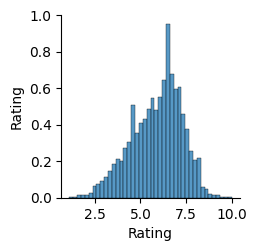

In [35]:
plt.figure(figsize=(40,20))
snr.pairplot(data2)
plt.xticks(rotation=90)
plt.show()

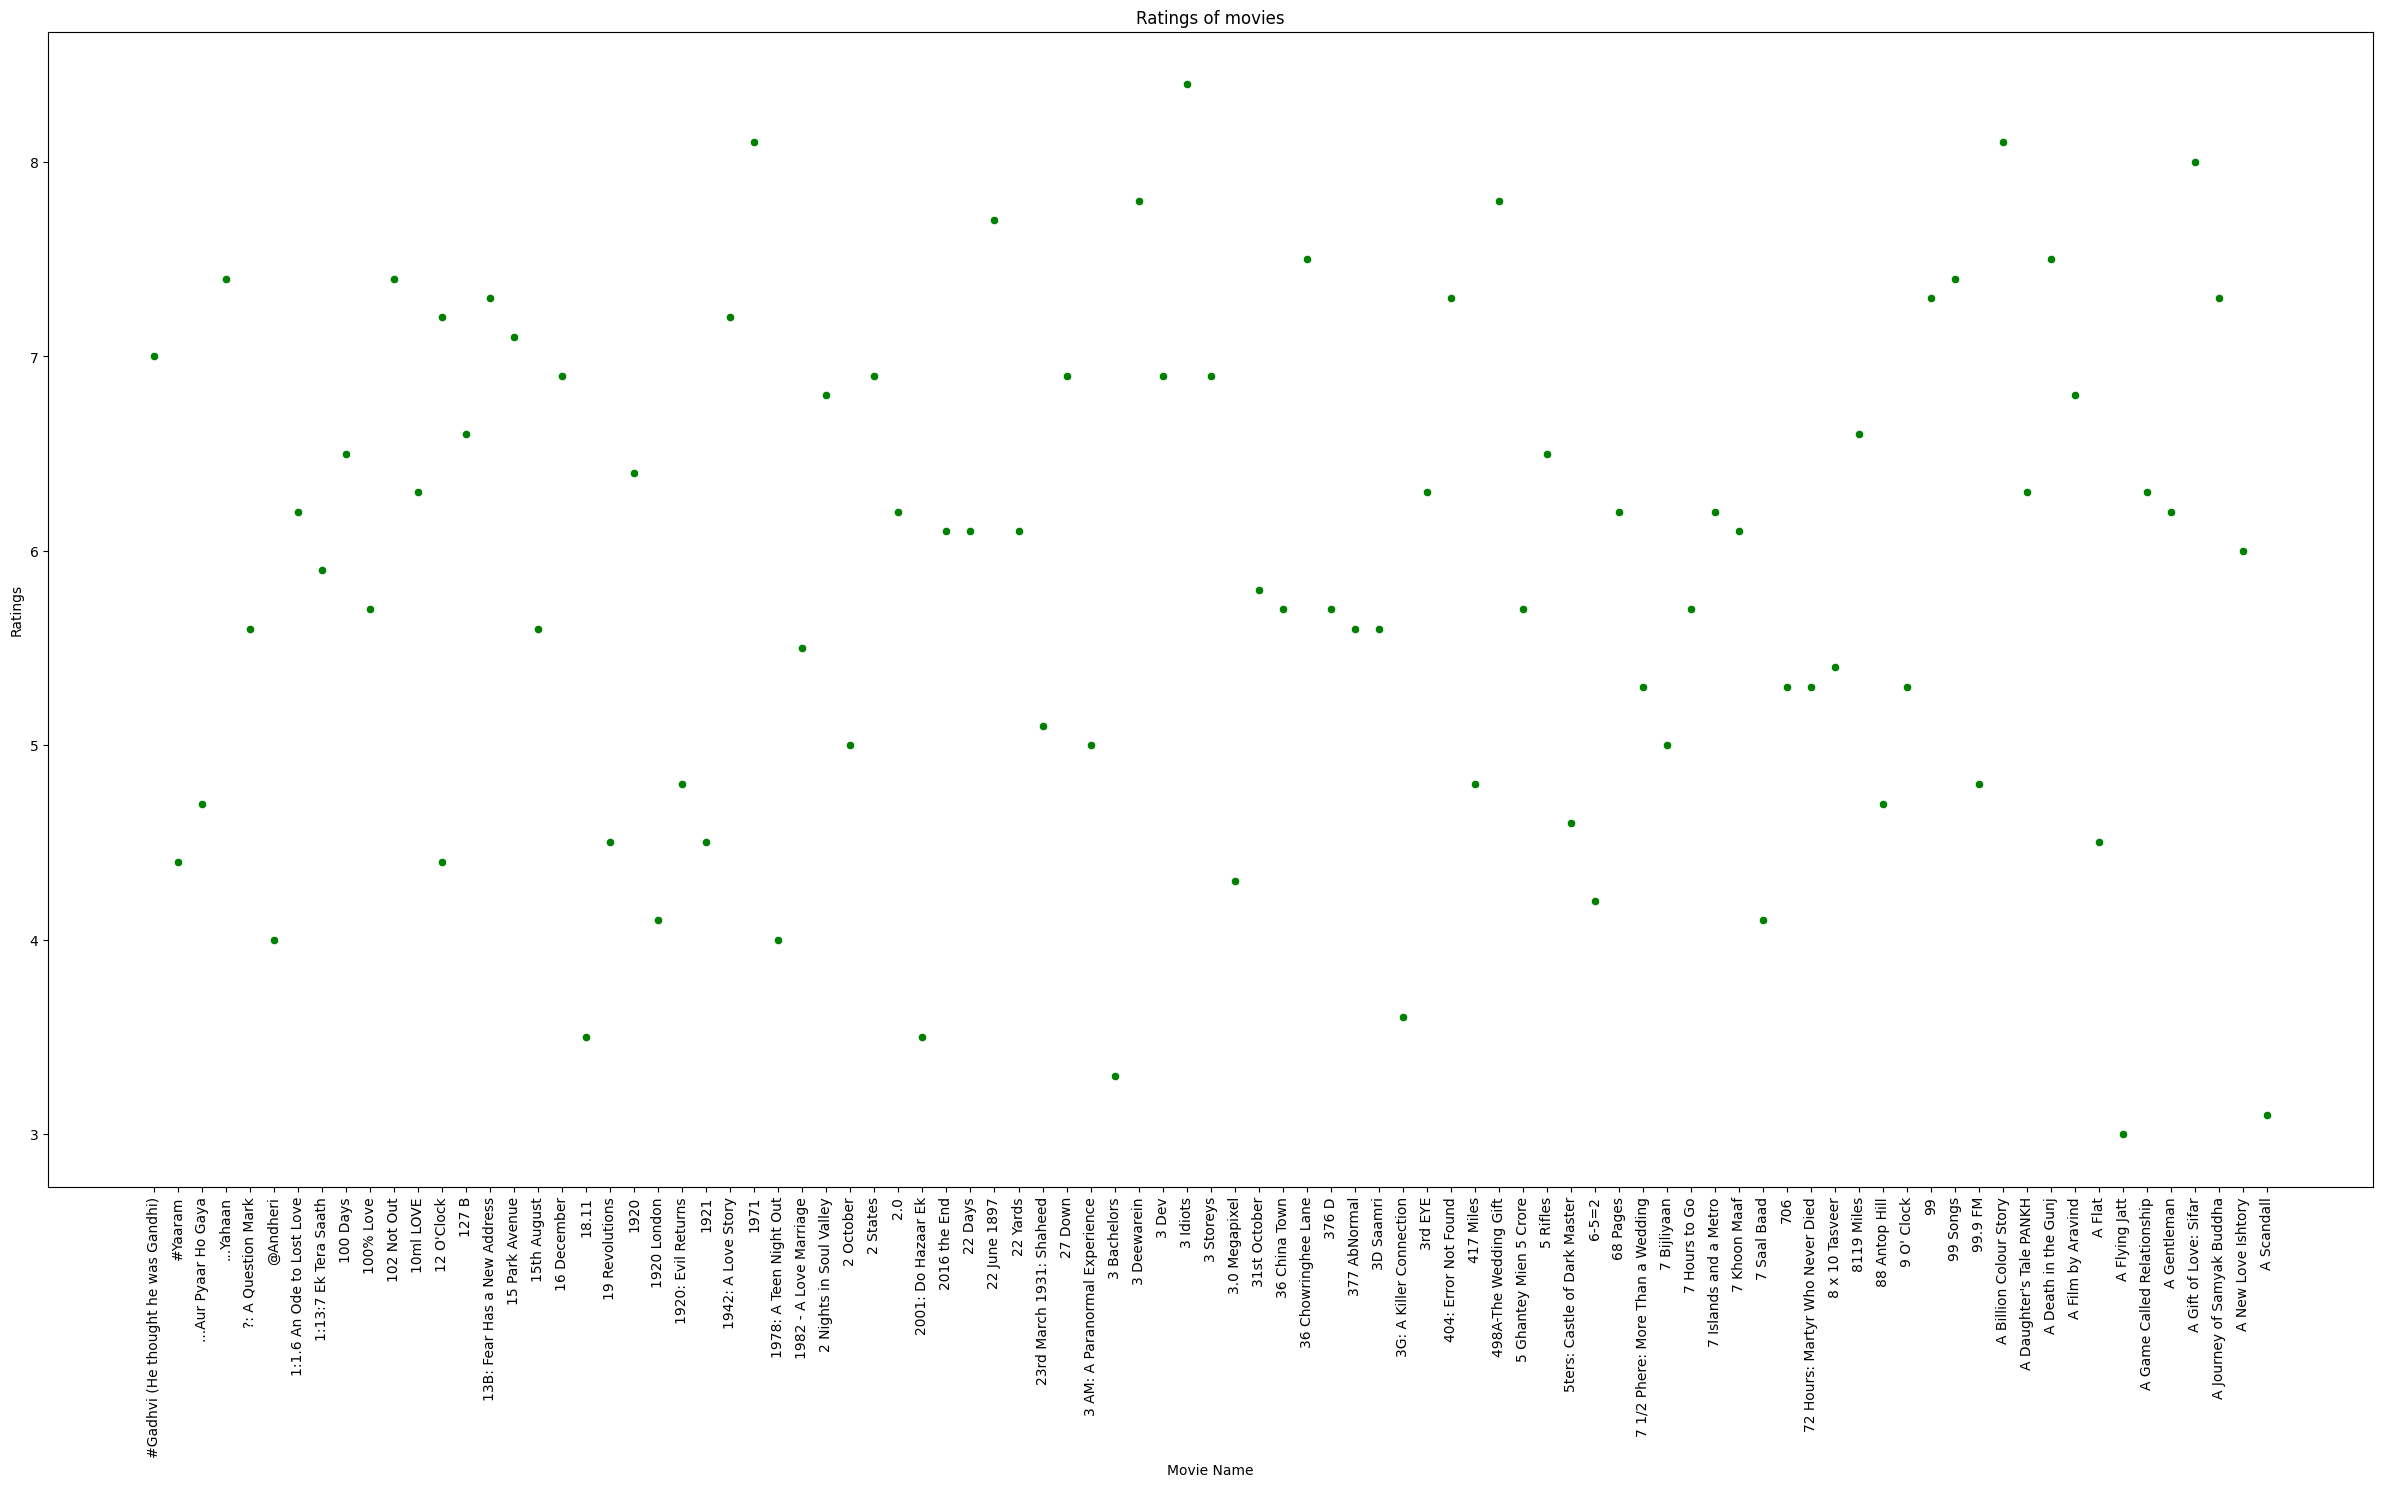

In [36]:
plt.figure(figsize=(30, 15))
snr.scatterplot(x='Name', y='Rating', data=data2.head(90), color='g')
plt.xticks(rotation=90)
plt.title('Ratings of movies')
plt.xlabel('Movie Name')
plt.ylabel('Ratings')
plt.show()

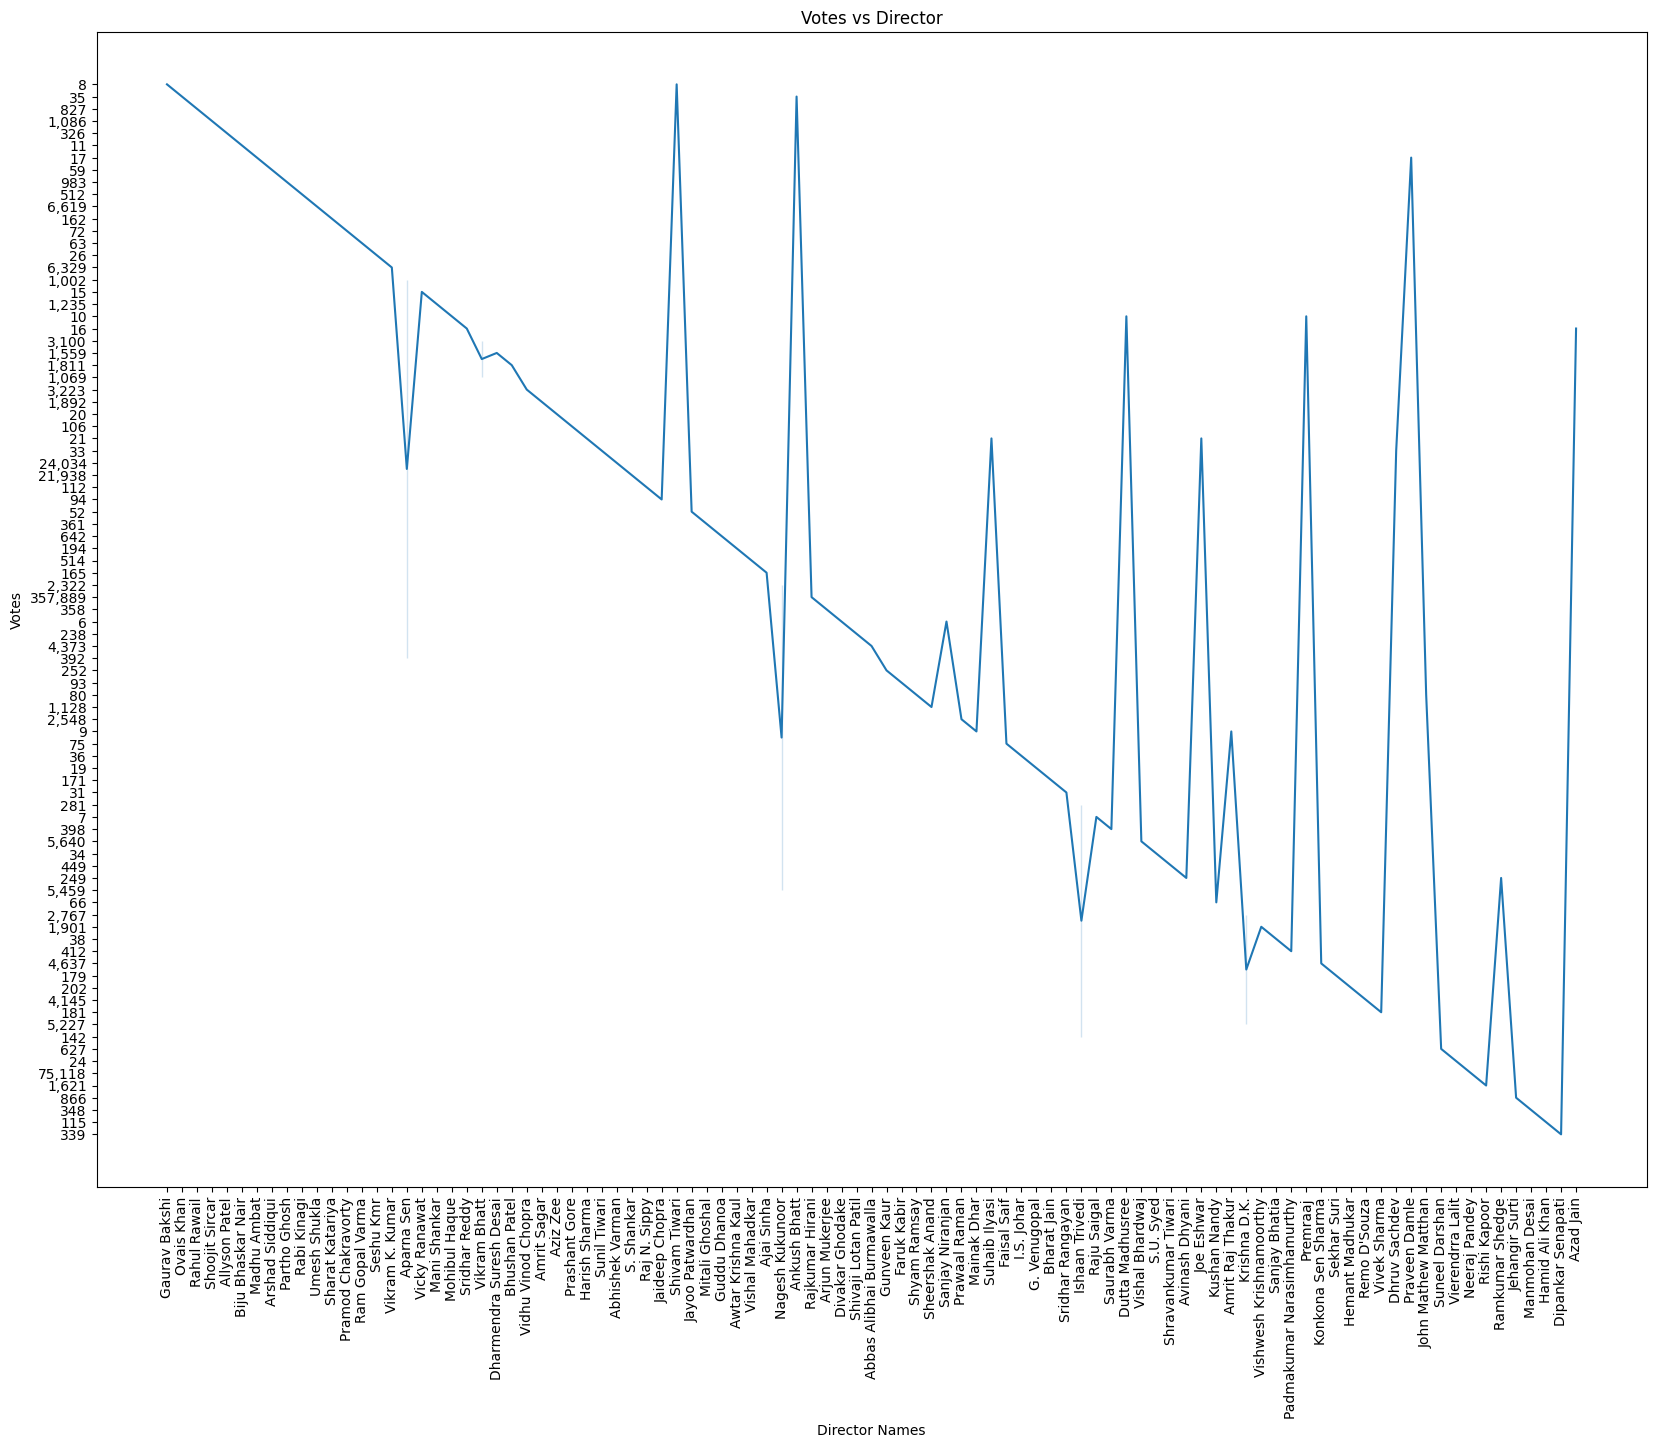

In [37]:
plt.figure(figsize=(20, 15))
snr.lineplot(x='Director', y='Votes', data=data2.head(100))
plt.xticks(rotation=90)
plt.title('Votes vs Director')
plt.xlabel('Director Names')
plt.ylabel('Votes')
plt.show()

<ipython-input-38-38624b8c0153>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  snr.barplot(data=data2.head(200), x='Genre', y='Rating', palette='dark')


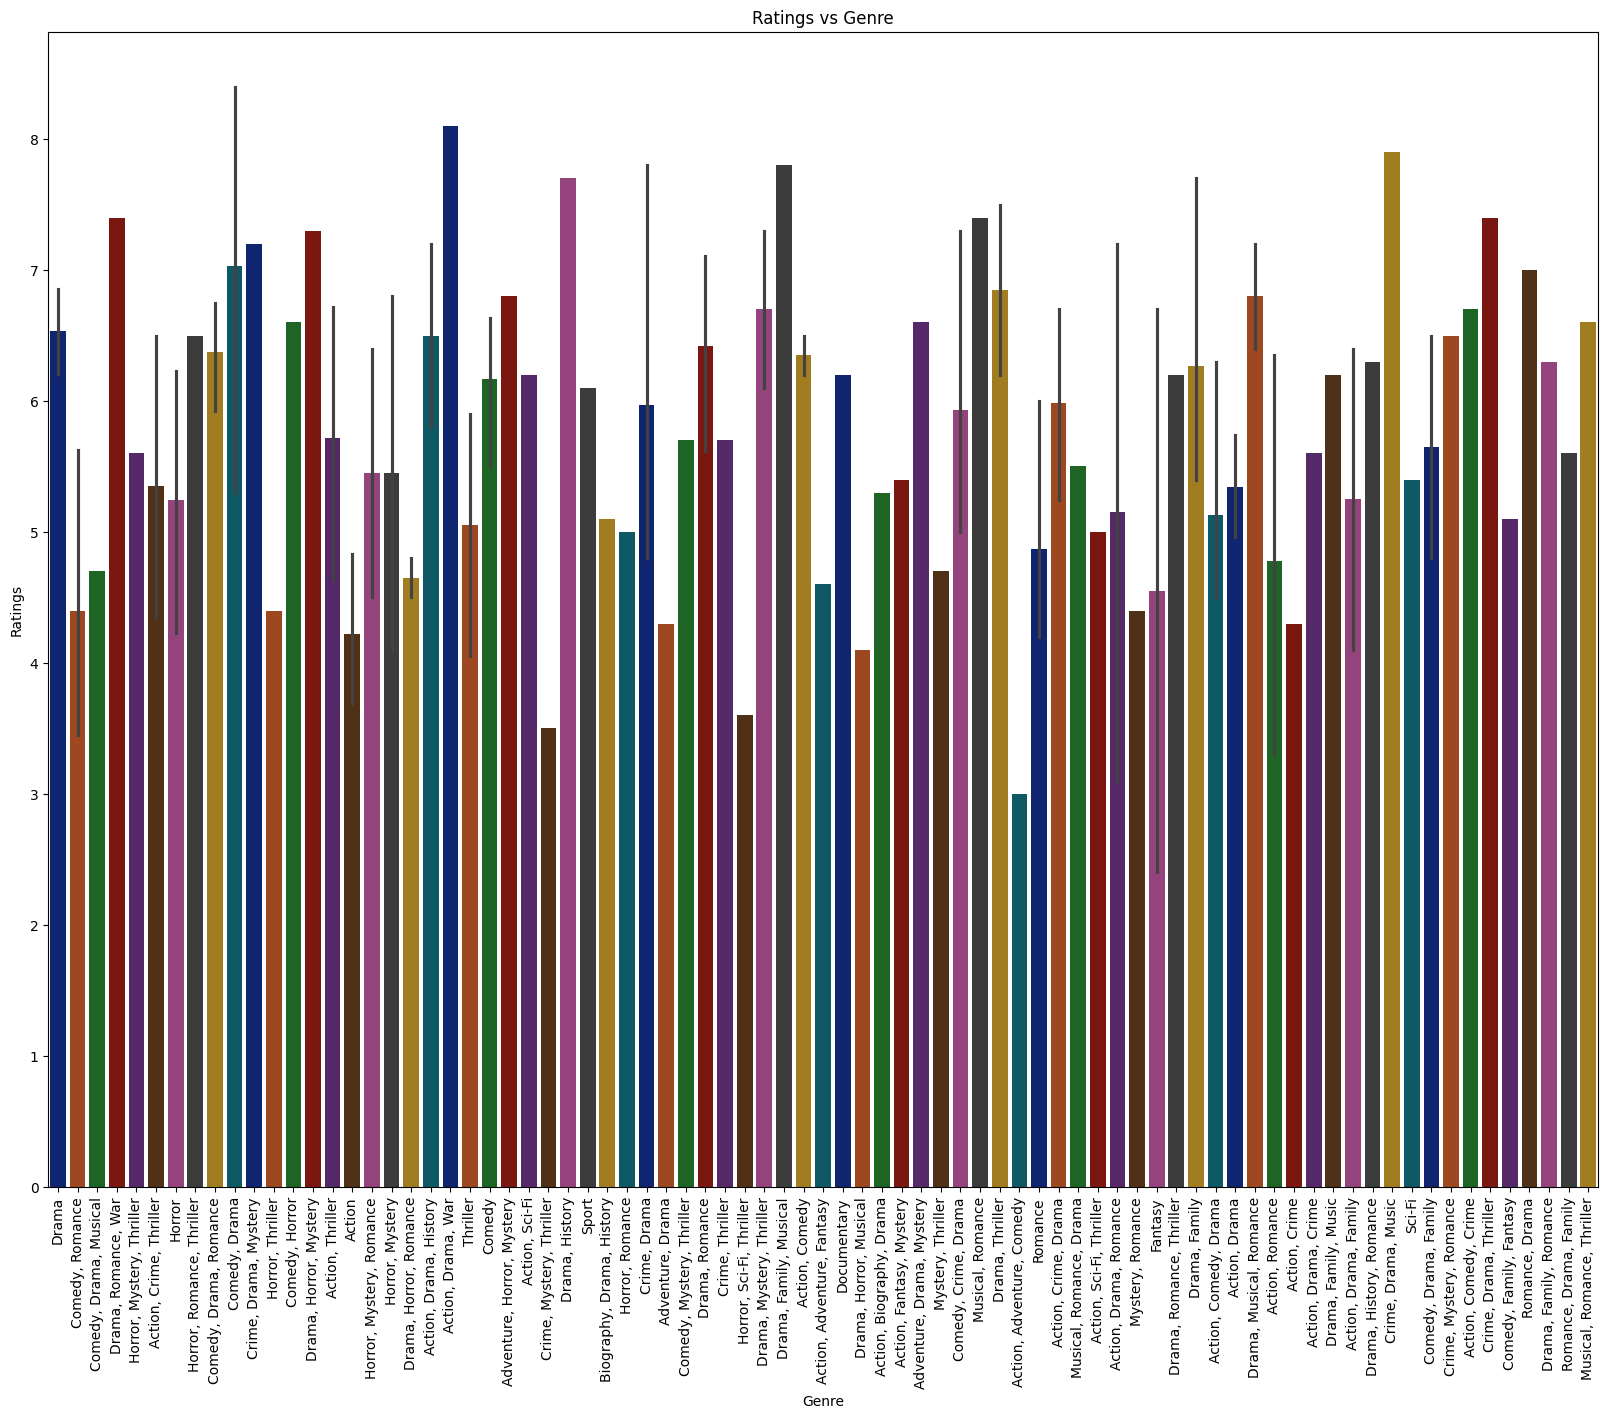

In [38]:
plt.figure(figsize=(20, 15))
snr.barplot(data=data2.head(200), x='Genre', y='Rating', palette='dark')
plt.xticks(rotation=90)
plt.title('Ratings vs Genre')
plt.xlabel('Genre')
plt.ylabel('Ratings')
plt.show()

<ipython-input-39-73077bfdc5c0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  snr.distplot(data2['Rating'], color='g')


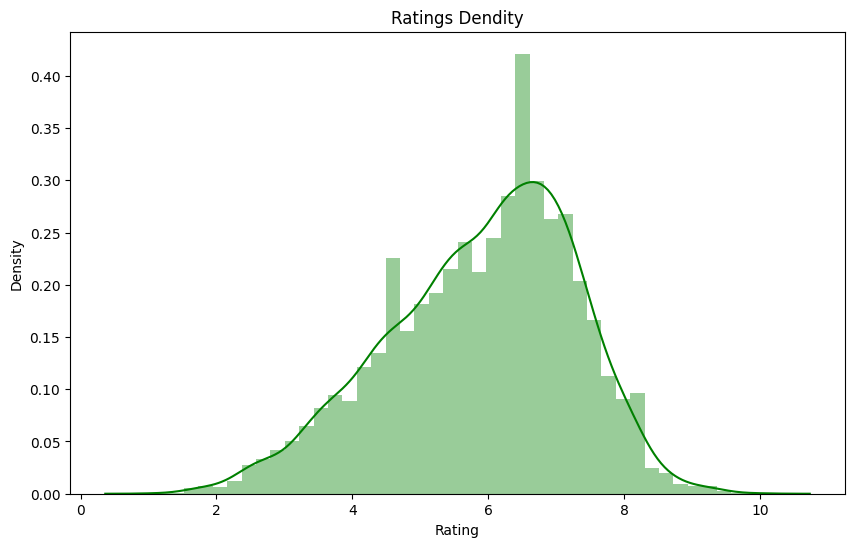

In [39]:
plt.figure(figsize=(10, 6))
snr.distplot(data2['Rating'], color='g')
plt.title('Ratings Dendity')
plt.show()

Text(0, 0.5, 'Ratings')

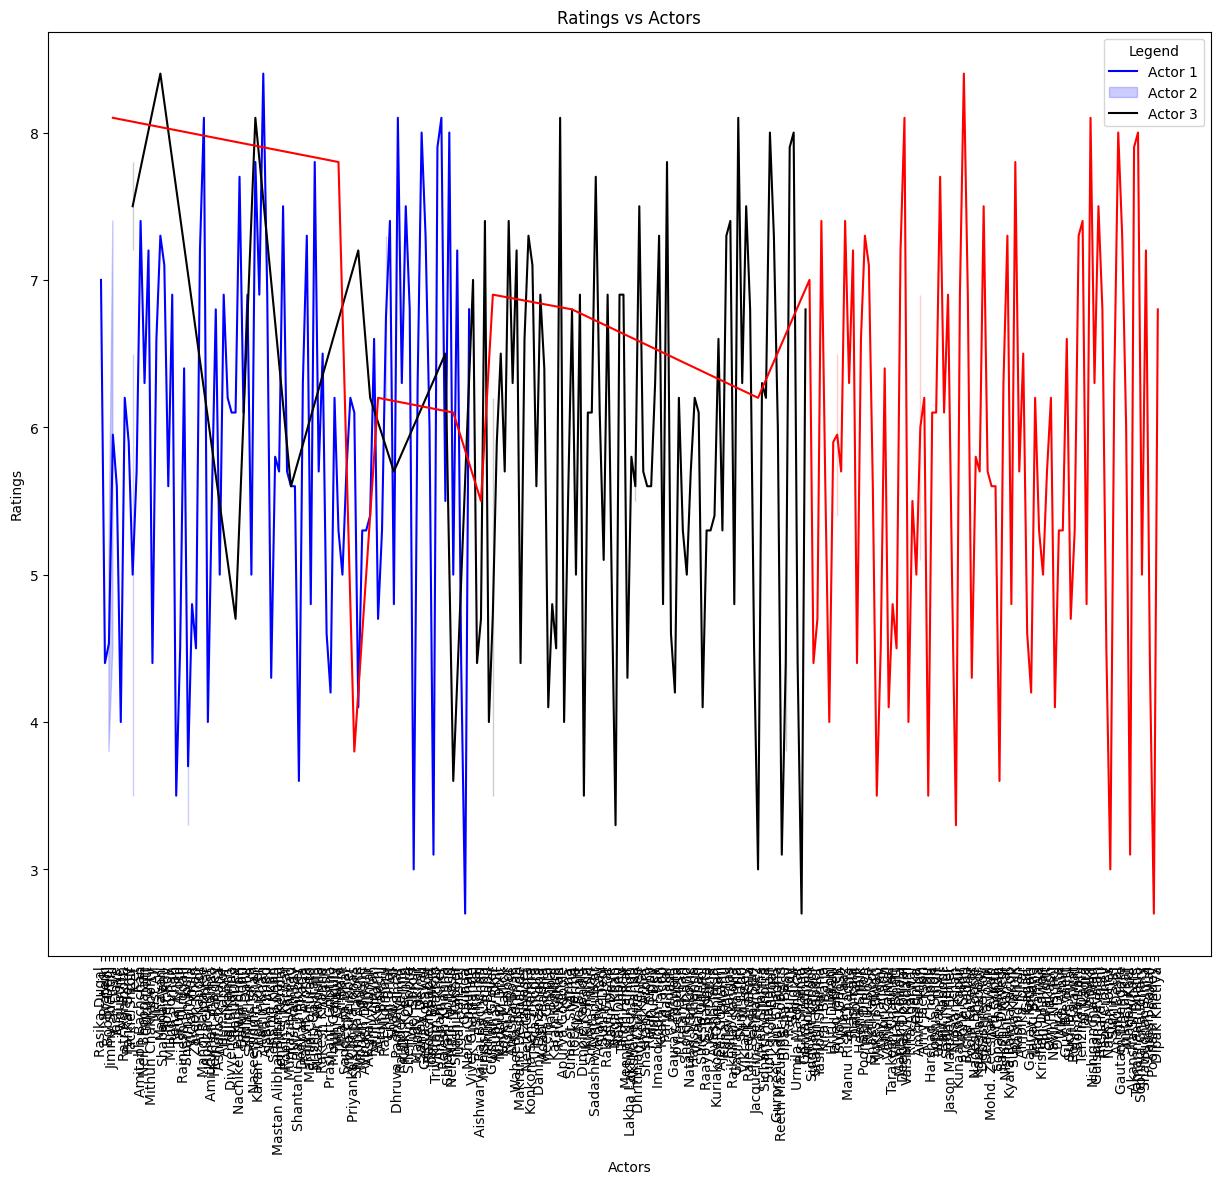

In [40]:
plt.figure(figsize=(15, 12))
snr.lineplot(data=data2.head(100), x='Actor 1', y='Rating', color='blue')
snr.lineplot(data=data2.head(100), x='Actor 2', y='Rating', color='black')
snr.lineplot(data=data2.head(100), x='Actor 3', y='Rating', color='red')
plt.legend(title='Legend', labels=['Actor 1', 'Actor 2', 'Actor 3'])
plt.xticks(rotation=90)
plt.title('Ratings vs Actors')
plt.xlabel('Actors')
plt.ylabel('Ratings')